In [1]:
%load_ext autoreload
%autoreload 2

from DarkMatter import *

Welcome to JupyROOT 6.26/08


In [17]:
def file_conversion(input_file, output_file):
    f = open(const.REF_DIR+f"/{input_file}")

    lines = []
    for line in f.readlines():

        l = line.split(",")
        temp = []
        for s in l:
            s = s.replace("'", '')
            s = s.replace("[", '')
            s = s.replace("]", '')
            try:
                temp.append(float(s))
            except:
                continue
        if len(temp)>0:

            lines.append(temp)

    lines = np.asarray(lines)
    print(lines)
    if len(lines[0]) == 3:
        tab = Table(lines, names = ["x", "dNdE", "mass"])
    elif len(lines[0]) ==4:
        tab = Table(lines, names = ["x", "dNdE", "dNdE_endpoint", "mass"])
#    tab = Table(lines, names = ["mass", "signu"])
    np.save(const.REF_DIR+f"/{output_file}.npy",tab)
    
def change_file(new, old, which="wino"):
    os.system("mv "+const.REF_DIR+f"/{which}_dnde.npy "+const.REF_DIR+f"/{old}.npy" )
    os.system("mv "+const.REF_DIR+f"/{new}.npy "+const.REF_DIR+f"/{which}_dnde.npy" )

In [62]:
file_conversion("dnde_quintuplet_results_LoMass040925.csv", "q_final_l")

[[3.16227766e-04 2.16444890e+02 8.00000000e+02]
 [3.80342562e-04 2.01680316e+02 8.00000000e+02]
 [4.57456554e-04 1.86291924e+02 8.00000000e+02]
 ...
 [9.99221290e-01 7.21206153e-03 5.55000000e+04]
 [9.99998952e-01 1.48550663e-02 5.55000000e+04]
 [1.00000000e+00 2.97146627e-05 5.55000000e+04]]


In [58]:
change_file("dnde_wino_final", "temp", which="wino")

In [63]:
d1 = np.load(const.REF_DIR+"q_final_h.npy")
d2 = np.load(const.REF_DIR+"q_final_l.npy")
d = np.concatenate((d2, d1))

In [64]:
np.save(const.REF_DIR+"quintuplet_dnde_finer.npy", d)

In [65]:
change_file("quintuplet_dnde_finer", "dnde_quintuplet_final", which="quintuplet")

## UL curve calculation

In [66]:
data = Qspectra(return_table=True)

mass = list(set(data["mass"]))

mass.sort()

In [67]:
np.arange(45000, 50001, step=500)

array([45000, 45500, 46000, 46500, 47000, 47500, 48000, 48500, 49000,
       49500, 50000])

In [60]:
# data = WINOspectra(return_table=True)

# mass = list(set(data["mass"]))

# mass.sort()
mass = np.arange(45000, 50001, step=500)
mle = Likelihood.combinedUpperLimits("quintuplet", package="EventDisplay", 
                                     dwarfs=const.ListOfDwarf, method=2,
                                     ext=True, DM_spectra="quintuplet",
                                     mass=mass, addTheta=False, averagedIRF=True, 
                                     useBias=True, 
                                     correction=True, bkgModel="gaus", filename="quintuplet_final_all", 
                                    )

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/25 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/wino_final_all.npy'


In [10]:
data = WINOspectra(return_table=True)

mass = list(set(data["mass"]))

mass.sort()

mle = Likelihood.combinedUpperLimits("wino", package="EventDisplay", 
                                     dwarfs=["Segue_1", "UMa_II"], method=2,
                                     ext=True, DM_spectra="quintuplet",
                                     mass=mass, addTheta=False, averagedIRF=True, 
                                     useBias=True, 
                                     correction=True, bkgModel="gaus", filename="wino_sm", 
                                    )

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 2
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/wino_sm.npy'
  FUNCTION VALUE DOES NOT SEEM TO DEPEND ON ANY OF THE 3 VARIABLE PARAMETERS.
          VERIFY THAT STEP SIZES ARE BIG ENOUGH AND CHECK FCN LOGIC.
 *******************************************************************************
 *******************************************************************************
  FUNCTION VALUE DOES NOT SEEM TO DEPEND ON ANY OF THE 3 VARIABLE PARAMETERS.
          VERIFY THAT STEP SIZES ARE BIG ENOUGH AND CHECK FCN LOGIC.
 *******************************************************************************
 *******************************************************************************
  FUNCTION VALUE DOES NOT SEEM TO DEPEND ON ANY OF THE 3 VARIABLE PARAMETERS.
          VERIFY THAT STEP SIZES ARE BIG ENOUGH AND CHECK FCN LOGIC.
 *******************************************************************************
 ********************************************************************

cp: /Users/dtak/Research/DarkMatter/Output/wino_sm.npy: No such file or directory


In [11]:
Likelihood.calcUpperLimits

<function DarkMatter.Likelihood.upperlimit.calcUpperLimits(dwarf, channel, package='EventDisplay', irf=None, jProfile=None, jArray=True, version='all', th2Cut=0, addTheta=False, averagedIRF=True, method=1, fix_b=False, filename=None, seed=0, jSeed='median', overWrite=False, mass=array([  100.        ,   135.387618  ,   183.29807108,   248.16289228,
         335.98182863,   454.8777947 ,   615.84821107,   833.78222347,
        1128.83789168,  1528.30673266,  2069.13808111,  2801.3567612 ,
        3792.69019073,  5134.83290744,  6951.92796178,  9412.04967268,
       12742.74985703, 17252.10549942, 23357.2146909 , 31622.77660168]), bkgModel=None, ext=False, statistic='unbinned', verbosity=True, returnTS=False, returnProfile=False, returnUL=False, returnMLE=False, write=True, test=False, **kwargs)>

In [59]:
data = WINOspectra(return_table=True)

mass = list(set(data["mass"]))

mass.sort()


mle = Likelihood.calcUpperLimits("UMa_II", "wino", package="EventDisplay", 
                                      method=2,
                                     ext=True, DM_spectra="wino",
                                     mass=mass, addTheta=False, averagedIRF=True, 
                                     useBias=True, 
                                     correction=True, bkgModel="gaus", filename="wino_UMa_II", 
                                    )

[Log] Package      : EventDisplay
[Log] Dwarf        : UMa_II
[Log] Channel      : wino
[Log] Dataset      : Extended (theta2=0.008)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/25 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/wino_UMa_II.npy'


In [68]:
# data = WINOspectra(return_table=True)

# mass = list(set(data["mass"]))

# mass.sort()

mass = np.arange(45000, 50001, step=500)

mle = Likelihood.calcUpperLimits("UMa_II", "quintuplet", package="EventDisplay", 
                                      method=2,
                                     ext=True, DM_spectra="quintuplet",
                                     mass=mass, addTheta=False, averagedIRF=True, 
                                     useBias=True, 
                                     correction=True, bkgModel="gaus", filename="quintuplet_test", 
                                    )

[Log] Package      : EventDisplay
[Log] Dwarf        : UMa_II
[Log] Channel      : quintuplet
[Log] Dataset      : Extended (theta2=0.008)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 45000 GeV
[Log] Maximum mass : 50 TeV


  0%|          | 0/11 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/quintuplet_test.npy'


cp: /Users/dtak/Research/DarkMatter/Output/quintuplet_test.npy: No such file or directory


In [69]:
np.load('/Users/dtak/Research/DarkMatter/Output/quintuplet_test.npy')

array([[ 4.50000000e+04, -2.35847146e+01],
       [ 4.55000000e+04, -2.34304933e+01],
       [ 4.60000000e+04, -2.32177525e+01],
       [ 4.65000000e+04, -2.30139341e+01],
       [ 4.70000000e+04, -2.31527909e+01],
       [ 4.75000000e+04, -2.36144627e+01],
       [ 4.80000000e+04, -2.40162747e+01],
       [ 4.85000000e+04, -2.42627048e+01],
       [ 4.90000000e+04, -2.43680141e+01],
       [ 4.95000000e+04, -2.43742931e+01],
       [ 5.00000000e+04, -2.43374015e+01]])

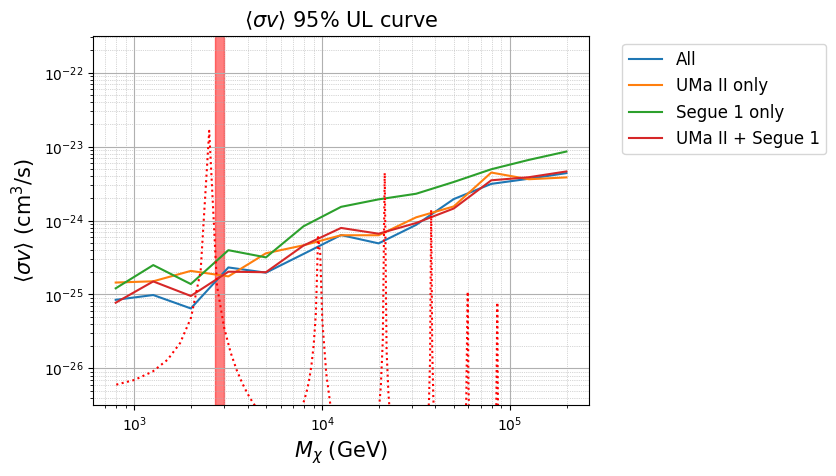

In [44]:
plotULcurve("wino_all", label="All")
plotULcurve("wino_uma_ii", label="UMa II only")
plotULcurve("wino_seque_1", label="Segue 1 only")
plotULcurve("wino_sm", label="UMa II + Segue 1")
plotPredictedLine(ls=":", color="r")


## Systematic calculation

In [28]:

uls = {}

data = WINOspectra(return_table=True)

mass = list(set(data["mass"]))

mass.sort()

for i in trange(300):
    
    
    ul = Likelihood.combinedUpperLimits("wino", package="EventDisplay", dwarfs=const.ListOfDwarf, method=2, 
                                         ext=True, DM_spectra="WINO",sys=True, mass=mass, addTheta=False, 
                                        averagedIRF=True, useBias=True, statistic="unbinned",
                                        correction=True, bkgModel="gaus", filename=False, signu=-25
                                        )
    for u in ul:
        if u[0] in uls.keys():

            uls[int(u[0])].append(u[1])
        else:
            uls[int(u[0])] = [u[1]]

np.save(const.OUTPUT_DIR+f"EventDisplay_stacked_sys_wino_1D_pub", uls)

  0%|          | 0/300 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).
[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).
[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).
[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).
[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).
[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).
[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).
[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).
[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).
[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).
[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).
[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).
[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).
[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).
[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/13 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 794 GeV
[Log] Maximum mass : 200 TeV


KeyboardInterrupt: 

[/opt/local/libexec/root6/lib/root/libCore.6.26.08.so] TUnixSystem::DispatchSignals(ESignals) (no debug info)
[/usr/lib/system/libsystem_platform.dylib] _sigtramp (no debug info)
[/usr/lib/system/libsystem_pthread.dylib] pthread_kill (no debug info)
[/usr/lib/system/libsystem_c.dylib] abort (no debug info)
[/usr/lib/libc++abi.dylib] __cxxabiv1::__aligned_malloc_with_fallback(unsigned long) (no debug info)
[/usr/lib/libc++abi.dylib] demangling_terminate_handler() (no debug info)
[/usr/lib/libobjc.A.dylib] _objc_terminate() (no debug info)
[/usr/lib/libc++abi.dylib] std::__terminate(void (*)()) (no debug info)
[/usr/lib/libc++abi.dylib] __cxa_get_exception_ptr (no debug info)
[/usr/lib/libc++abi.dylib] __cxxabiv1::exception_cleanup_func(_Unwind_Reason_Code, _Unwind_Exception*) (no debug info)
[<unknown binary>] (no debug info)
[/opt/local/libexec/root6/lib/root/libMinuit.6.26.08.so] TMinuit::Eval(int, double*, double&, double*, int) (no debug info)
[/opt/local/libexec/root6/lib/root/libM

libc++abi: terminating with uncaught exception of type CPyCppyy::PyException: python exception
 *** Break *** abort
libc++abi: terminating with uncaught exception of type CPyCppyy::PyException: python exception
 *** Break *** abort
libc++abi: terminating with uncaught exception of type CPyCppyy::PyException: python exception
 *** Break *** abort
libc++abi: terminating with uncaught exception of type CPyCppyy::PyException: python exception
 *** Break *** abort
libc++abi: terminating with uncaught exception of type CPyCppyy::PyException: python exception
 *** Break *** abort
libc++abi: terminating with uncaught exception of type CPyCppyy::PyException: python exception
 *** Break *** abort
libc++abi: terminating with uncaught exception of type CPyCppyy::PyException: python exception
 *** Break *** abort
libc++abi: terminating with uncaught exception of type CPyCppyy::PyException: python exception
 *** Break *** abort
libc++abi: terminating with uncaught exception of type CPyCppyy::PyExcep

## Test of the Energy Shift

In [ ]:
change_file("dnde_wino_final", "dnde_wino_endpoint")

In [58]:
change_file("dnde_wino_final", "dnde_wino_endpoint")

In [116]:
uls = []

ebins = np.linspace(1, 7, 101)

data = WINOspectra(return_table=True)

mass = list(set(data["mass"]))

mass.sort()

for m in mass[::5]:
    diff = ebins[np.argmin(abs(m-10**ebins))]-np.log10(m)
    new_ebins = 10**(ebins-diff)
    
    mle = Likelihood.combinedUpperLimits("wino", package="EventDisplay", dwarfs=const.ListOfDwarf, method=2,
                                         ext=True, DM_spectra="wino",
                                         mass=[m], addTheta=False, averagedIRF=True, useBias=True, 
                                         correction=True, bkgModel="gaus", filename=False, 
                                         energyEdges=new_ebins, 
                                        )
    if np.size(mle) == 2:
        uls.append(mle[0])
np.save(const.OUTPUT_DIR+"wino_eshift_final.npy", uls)

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 800 GeV
[Log] Maximum mass : 1 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 2000 GeV
[Log] Maximum mass : 2 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 3250 GeV
[Log] Maximum mass : 3 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 4500 GeV
[Log] Maximum mass : 4 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 5750 GeV
[Log] Maximum mass : 6 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 7000 GeV
[Log] Maximum mass : 7 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 8250 GeV
[Log] Maximum mass : 8 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 9500 GeV
[Log] Maximum mass : 10 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 11500 GeV
[Log] Maximum mass : 12 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 14000 GeV
[Log] Maximum mass : 14 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 16500 GeV
[Log] Maximum mass : 16 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 19000 GeV
[Log] Maximum mass : 19 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 21500 GeV
[Log] Maximum mass : 22 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 24000 GeV
[Log] Maximum mass : 24 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 26500 GeV
[Log] Maximum mass : 26 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 29000 GeV
[Log] Maximum mass : 29 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 31500 GeV
[Log] Maximum mass : 32 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 34000 GeV
[Log] Maximum mass : 34 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).
[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 36500 GeV
[Log] Maximum mass : 36 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 39000 GeV
[Log] Maximum mass : 39 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 41500 GeV
[Log] Maximum mass : 42 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 44000 GeV
[Log] Maximum mass : 44 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 46500 GeV
[Log] Maximum mass : 46 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 49000 GeV
[Log] Maximum mass : 49 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 51500 GeV
[Log] Maximum mass : 52 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 54000 GeV
[Log] Maximum mass : 54 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56500 GeV
[Log] Maximum mass : 56 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 59000 GeV
[Log] Maximum mass : 59 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 61500 GeV
[Log] Maximum mass : 62 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 64000 GeV
[Log] Maximum mass : 64 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 66500 GeV
[Log] Maximum mass : 66 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 69000 GeV
[Log] Maximum mass : 69 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 71500 GeV
[Log] Maximum mass : 72 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 74000 GeV
[Log] Maximum mass : 74 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 76500 GeV
[Log] Maximum mass : 76 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 79000 GeV
[Log] Maximum mass : 79 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 81500 GeV
[Log] Maximum mass : 82 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 84000 GeV
[Log] Maximum mass : 84 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 86500 GeV
[Log] Maximum mass : 86 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 89000 GeV
[Log] Maximum mass : 89 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 91500 GeV
[Log] Maximum mass : 92 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 94000 GeV
[Log] Maximum mass : 94 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 96500 GeV
[Log] Maximum mass : 96 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 99000 GeV
[Log] Maximum mass : 99 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 107500 GeV
[Log] Maximum mass : 108 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 120000 GeV
[Log] Maximum mass : 120 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 132500 GeV
[Log] Maximum mass : 132 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 145000 GeV
[Log] Maximum mass : 145 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 157500 GeV
[Log] Maximum mass : 158 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 170000 GeV
[Log] Maximum mass : 170 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 182500 GeV
[Log] Maximum mass : 182 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 195000 GeV
[Log] Maximum mass : 195 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[/opt/local/libexec/root6/lib/root/libCore.6.26.08.so] TUnixSystem::DispatchSignals(ESignals) (no debug info)
[/usr/lib/system/libsystem_platform.dylib] _sigtramp (no debug info)
[/usr/lib/system/libsystem_pthread.dylib] pthread_kill (no debug info)
[/usr/lib/system/libsystem_c.dylib] abort (no debug info)
[/usr/lib/libc++abi.dylib] __cxxabiv1::__aligned_malloc_with_fallback(unsigned long) (no debug info)
[/usr/lib/libc++abi.dylib] demangling_terminate_handler() (no debug info)
[/usr/lib/libobjc.A.dylib] _objc_terminate() (no debug info)
[/usr/lib/libc++abi.dylib] std::__terminate(void (*)()) (no debug info)
[/usr/lib/libc++abi.dylib] __cxa_get_exception_ptr (no debug info)
[/usr/lib/libc++abi.dylib] __cxxabiv1::exception_cleanup_func(_Unwind_Reason_Code, _Unwind_Exception*) (no debug info)
[<unknown binary>] (no debug info)
[/opt/local/libexec/root6/lib/root/libMinuit.6.26.08.so] TMinuit::Eval(int, double*, double&, double*, int) (no debug info)
[/opt/local/libexec/root6/lib/root/libM

libc++abi: terminating with uncaught exception of type CPyCppyy::PyException: python exception
 *** Break *** abort
libc++abi: terminating with uncaught exception of type CPyCppyy::PyException: python exception
 *** Break *** abort


In [117]:
mle = Likelihood.combinedUpperLimits("wino", package="EventDisplay", dwarfs=const.ListOfDwarf, method=2,
                                     ext=True, DM_spectra="wino",
                                     mass=mass[::5], addTheta=False, averagedIRF=True, useBias=True, 
                                     correction=True, bkgModel="gaus", filename="wino_no_eshift_final", 
                                    )

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 800 GeV
[Log] Maximum mass : 195 TeV


  0%|          | 0/52 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/wino_no_eshift_final.npy'
